In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("My Uber Drives - 2016.csv")

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#dataset contains 1156 rows and 7 columns

In [ ]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [ ]:
df.columns=['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE']

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**handling missing values**

In [ ]:
df.isnull().any()

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [ ]:
df.isnull().sum()/len(df)*100

START_DATE     0.000000
END_DATE       0.086505
CATEGORY       0.086505
START          0.086505
STOP           0.086505
MILES          0.000000
PURPOSE       43.512111
dtype: float64

In [ ]:
df["PURPOSE"].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [ ]:
df["PURPOSE"]=df["PURPOSE"].fillna("Unknown")

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#numerical columns
num_col=df.select_dtypes(include=["float"]).columns

In [ ]:
cat_col=df.select_dtypes(include=["object"]).columns
cat_col


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')

In [ ]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],format="%m/%d/%Y %H:%M")
df['START_DATE']


0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE, Length: 1155, dtype: datetime64[ns]

In [ ]:
df['END_DATE']=pd.to_datetime(df['END_DATE'],format="%m/%d/%Y %H:%M")
df['END_DATE']

0      2016-01-01 21:17:00
1      2016-01-02 01:37:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
               ...        
1150   2016-12-31 01:14:00
1151   2016-12-31 13:42:00
1152   2016-12-31 15:38:00
1153   2016-12-31 21:50:00
1154   2016-12-31 23:51:00
Name: END_DATE, Length: 1155, dtype: datetime64[ns]

In [ ]:
df['Hour']=df['START_DATE'].apply(lambda time:time.hour)

In [ ]:
df['Month']=df['START_DATE'].apply(lambda time:time.month)

In [ ]:
df['dayofweek']=df['START_DATE'].apply(lambda time:time.dayofweek)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,dayofweek
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,1,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,2


In [ ]:
  dmap={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}

In [ ]:
df["dayofweek"]=df["dayofweek"].map(dmap)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,dayofweek
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,Wednesday


In [ ]:
dmon={1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEPT",10:"OCT",11:"NOV",12:"DEC"}

In [ ]:
df["Month"]=df["Month"].map(dmon)

In [ ]:
df.sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,dayofweek
49,2016-01-27 14:46:00,2016-01-27 15:08:00,Business,Raleigh,Cary,12.9,Customer Visit,14,JAN,Wednesday
1098,2016-12-23 09:21:00,2016-12-23 09:41:00,Business,Lahore,Lahore,3.0,Meeting,9,DEC,Friday
594,2016-07-23 23:18:00,2016-07-23 23:43:00,Business,Durham,Cary,9.9,Meeting,23,JUL,Saturday
652,2016-08-11 20:59:00,2016-08-11 21:44:00,Business,Wake Forest,Cary,31.9,Unknown,20,AUG,Thursday
599,2016-07-26 15:43:00,2016-07-26 15:49:00,Business,Whitebridge,Westpark Place,2.2,Unknown,15,JUL,Tuesday
867,2016-10-28 11:34:00,2016-10-28 11:52:00,Business,Cary,Durham,10.4,Meeting,11,OCT,Friday
109,2016-02-16 08:29:00,2016-02-16 09:34:00,Business,Unknown Location,Colombo,14.1,Unknown,8,FEB,Tuesday
915,2016-11-06 20:06:00,2016-11-06 20:21:00,Business,West Berkeley,Central,3.3,Unknown,20,NOV,Sunday
340,2016-04-29 22:44:00,2016-04-29 23:19:00,Business,Durham,Cary,18.2,Meeting,22,APR,Friday
878,2016-10-30 12:24:00,2016-10-30 12:35:00,Business,Bryson City,Almond,6.6,Unknown,12,OCT,Sunday


In [ ]:
df["Duration"]=(df["END_DATE"]-df["START_DATE"])

In [ ]:
df["Duration"]=df["Duration"].astype("str")

In [ ]:
df["Duration"]=df["Duration"].map(lambda x:x[7:])

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,dayofweek,Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,JAN,Friday,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,JAN,Saturday,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,JAN,Saturday,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,JAN,Tuesday,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,JAN,Wednesday,01:07:00


***upperside is feature engineering::::***

In [ ]:

df[df["MILES"]==df["MILES"].max()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,dayofweek,Duration
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,16,MAR,Friday,05:30:00


In [ ]:

df[df["MILES"]==df["MILES"].min()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,dayofweek,Duration
44,2016-01-26 17:27:00,2016-01-26 17:29:00,Business,Cary,Cary,0.5,Errand/Supplies,17,JAN,Tuesday,00:02:00
120,2016-02-17 16:38:00,2016-02-17 16:43:00,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies,16,FEB,Wednesday,00:05:00
420,2016-06-08 17:16:00,2016-06-08 17:18:00,Business,Soho,Tribeca,0.5,Errand/Supplies,17,JUN,Wednesday,00:02:00


In [ ]:
df[df["Duration"]==df["Duration"].max()]


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,dayofweek,Duration
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Unknown,21,SEPT,Tuesday,05:36:00


In [ ]:
df[df["Duration"]==df["Duration"].min()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,dayofweek,Duration
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Unknown,17,SEPT,Tuesday,00:00:00
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Unknown,7,SEPT,Friday,00:00:00
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Unknown,15,OCT,Saturday,00:00:00
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,Unknown,13,OCT,Thursday,00:00:00


In [ ]:
#month wise ride
df["Month"].value_counts()

DEC     146
AUG     133
NOV     122
FEB     115
MAR     113
JUL     112
JUN     108
OCT     106
JAN      61
APR      54
MAY      49
SEPT     36
Name: Month, dtype: int64

In [ ]:
df["PURPOSE"].value_counts()

Unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [ ]:
df["CATEGORY"].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

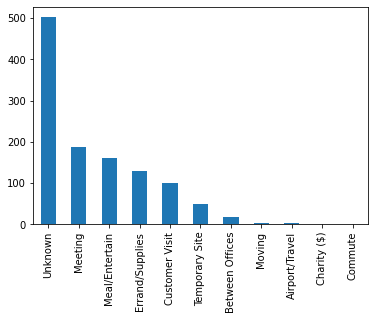

In [ ]:
df["PURPOSE"].value_counts().plot(kind="bar")
plt.show()

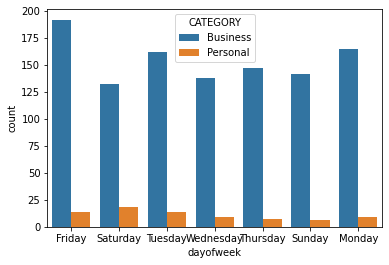

In [ ]:
#rides per week per category
sns.countplot(data=df,x="dayofweek",hue="CATEGORY")

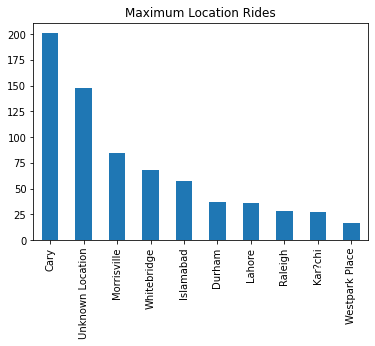

In [ ]:
plt.title("Maximum Location Rides")
df["START"].value_counts().nlargest(10).plot(kind="bar")
plt.show()
#max start location of rides

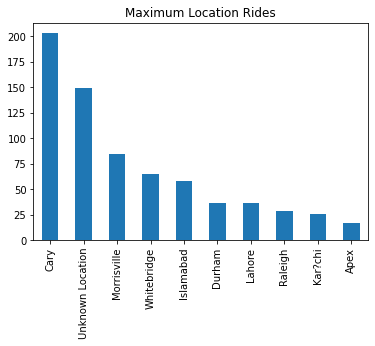

In [ ]:
plt.title("Maximum Location Rides Stop")
df["STOP"].value_counts().nlargest(10).plot(kind="bar")
plt.show()
# MAXIMUM STOP LOCATION IN RIDES

In [ ]:
#INSIGHTS

1.MIN duration of trip was 0 sec (ride is cancelled).
2.MAX duration of trip was 5 hr 36 min .
3.MAX miles travelled is 310 (From latta to Jacksonvilla).
4.MIN miles travelled was 0.5 miles(erens and supplies).
5.DEC was bussiest month with 146 rides and SEP was least busy with 36 rides.
6.most rides were for the business purpose.
7.top purposes were meeting supllies and erands.
8.bussiest day of week is Friday for the riders.
9.top 3 start location include(cary,morisville,whitebridge)

